### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import itertools
from datetime import datetime, timedelta
from time import time

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Read data

In [4]:
df = pd.read_csv('MER_T12_06.csv')
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [5]:
df.shape

(5094, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [7]:
df.describe()

,YYYYMM,Column_Order
count,5094.000000,5094.000000
mean,199434.171378,5.000000
std,1257.074138,2.582242
min,197301.000000,1.000000
25%,198312.000000,3.000000
50%,199410.500000,5.000000
75%,200509.000000,7.000000
max,201607.000000,9.000000


In [8]:
df.describe(include='O')

,MSN,Value,Description,Unit
count,5094,5094,5094,5094
unique,9,3602,9,1
top,CLEIEUS,Not Available,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
freq,566,416,566,5094


In [9]:
df.isnull().sum()

MSN             0
YYYYMM          0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

In [10]:
# khong co du lieu null

In [11]:
# du lieu chua phai o dang Time Series => chuyen ve TS

In [12]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [13]:
# drop the non datetime index rows
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [14]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           4707 non-null   object
 1   Value         4707 non-null   object
 2   Column_Order  4707 non-null   int64 
 3   Description   4707 non-null   object
 4   Unit          4707 non-null   object
dtypes: int64(1), object(4)
memory usage: 220.6+ KB


In [15]:
# convert the emision value into numeric 
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')

In [16]:
ts.dropna(inplace = True)

### visualization

In [17]:
Energy_sources = ts.groupby('Description')
Energy_sources.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [18]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 14

In [19]:
# Su phu thuoc cua luong phat thai CO2 trong qua trinh san xuat dien va thoi gian

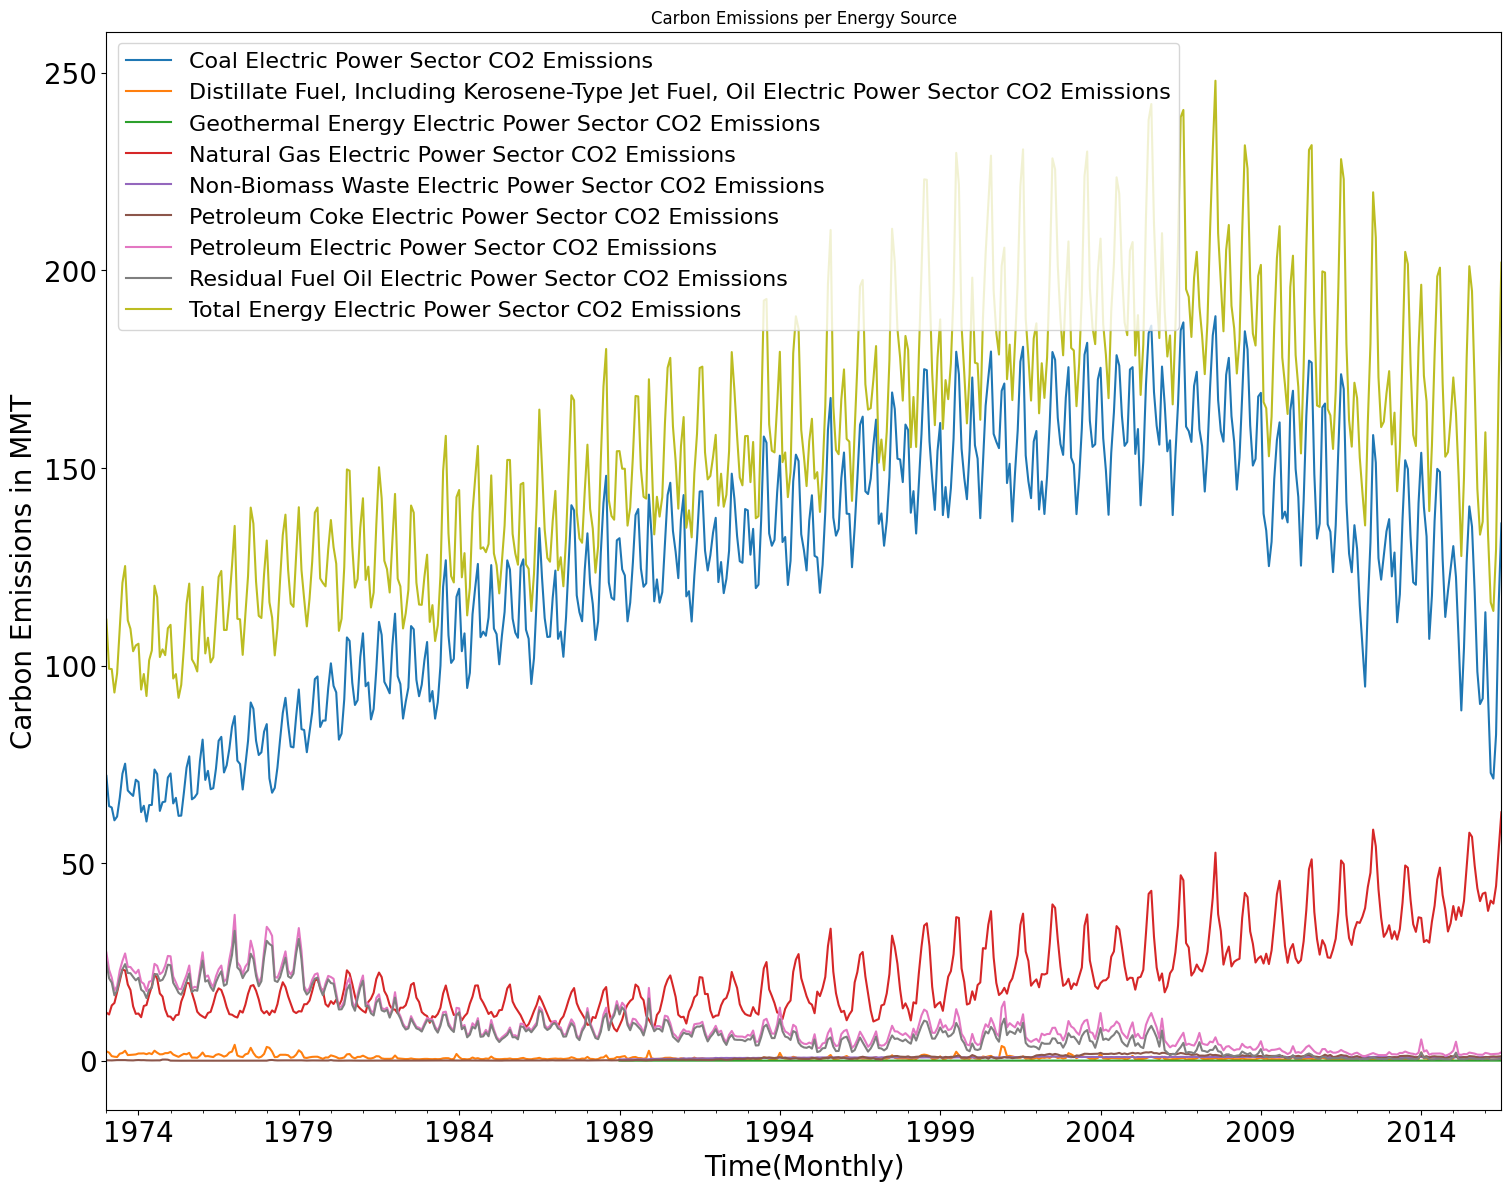

In [20]:
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

In [21]:
# CO2 Emissions per energy source

In [22]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()

In [23]:
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [24]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

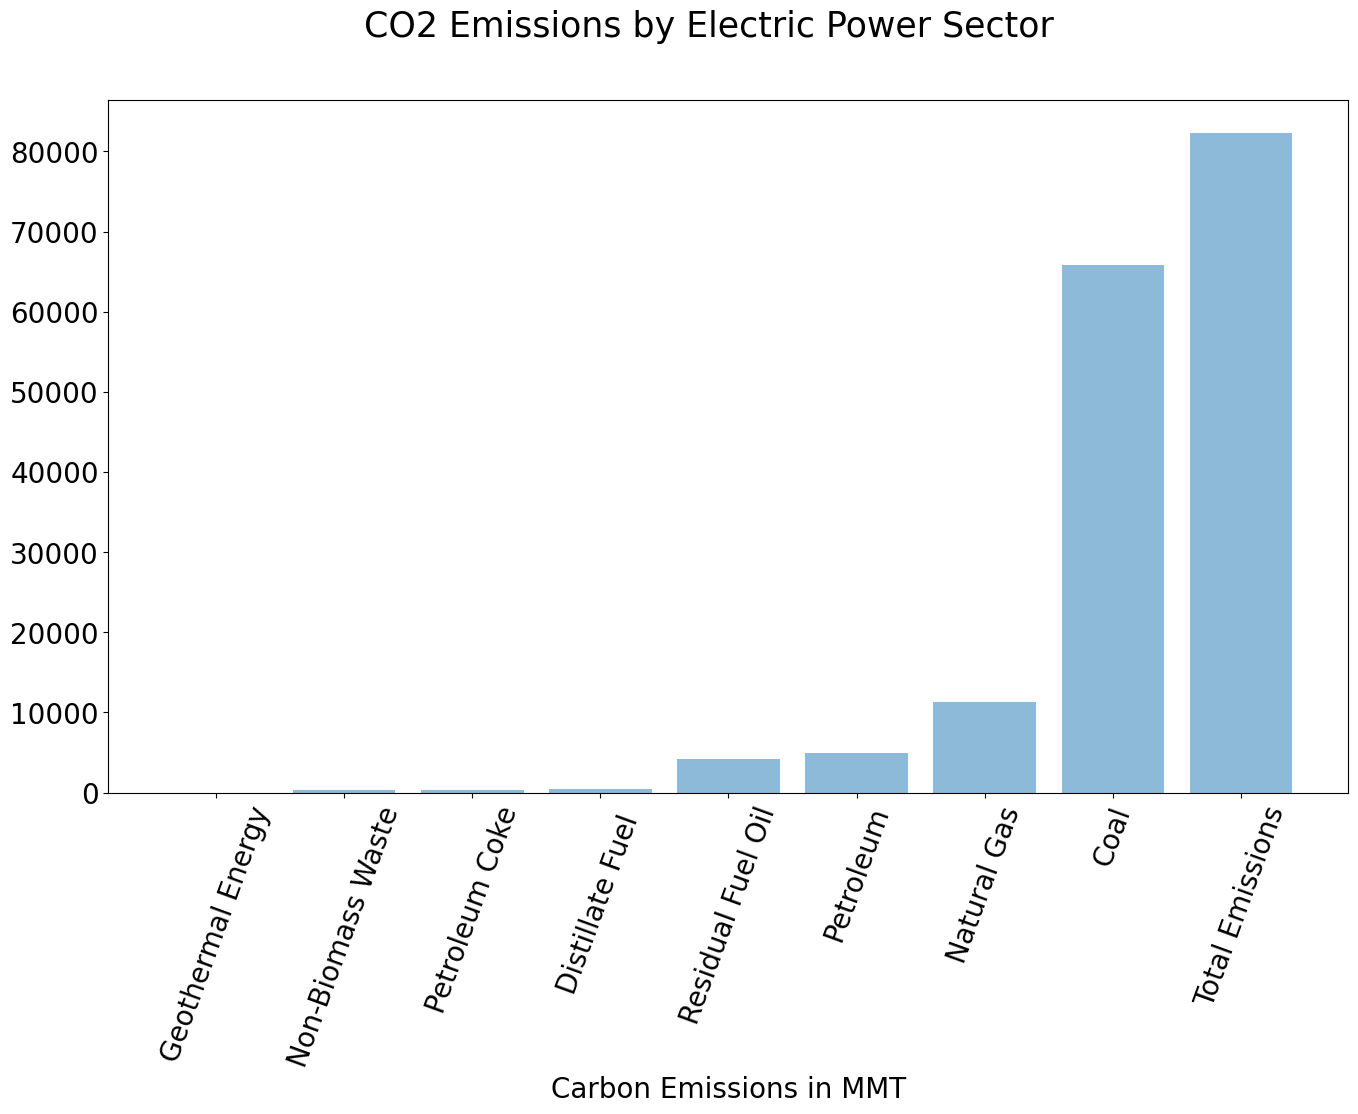

In [25]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

In [26]:
# Tu bieu do, ta thay than va khi tu nhien dong gop mot phan dang ke trong viec phat thai khi CO2

### Natural gas CO2 emission analysis

In [27]:
Emissions = ts.iloc[:,1:]   
Emissions= Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] 
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

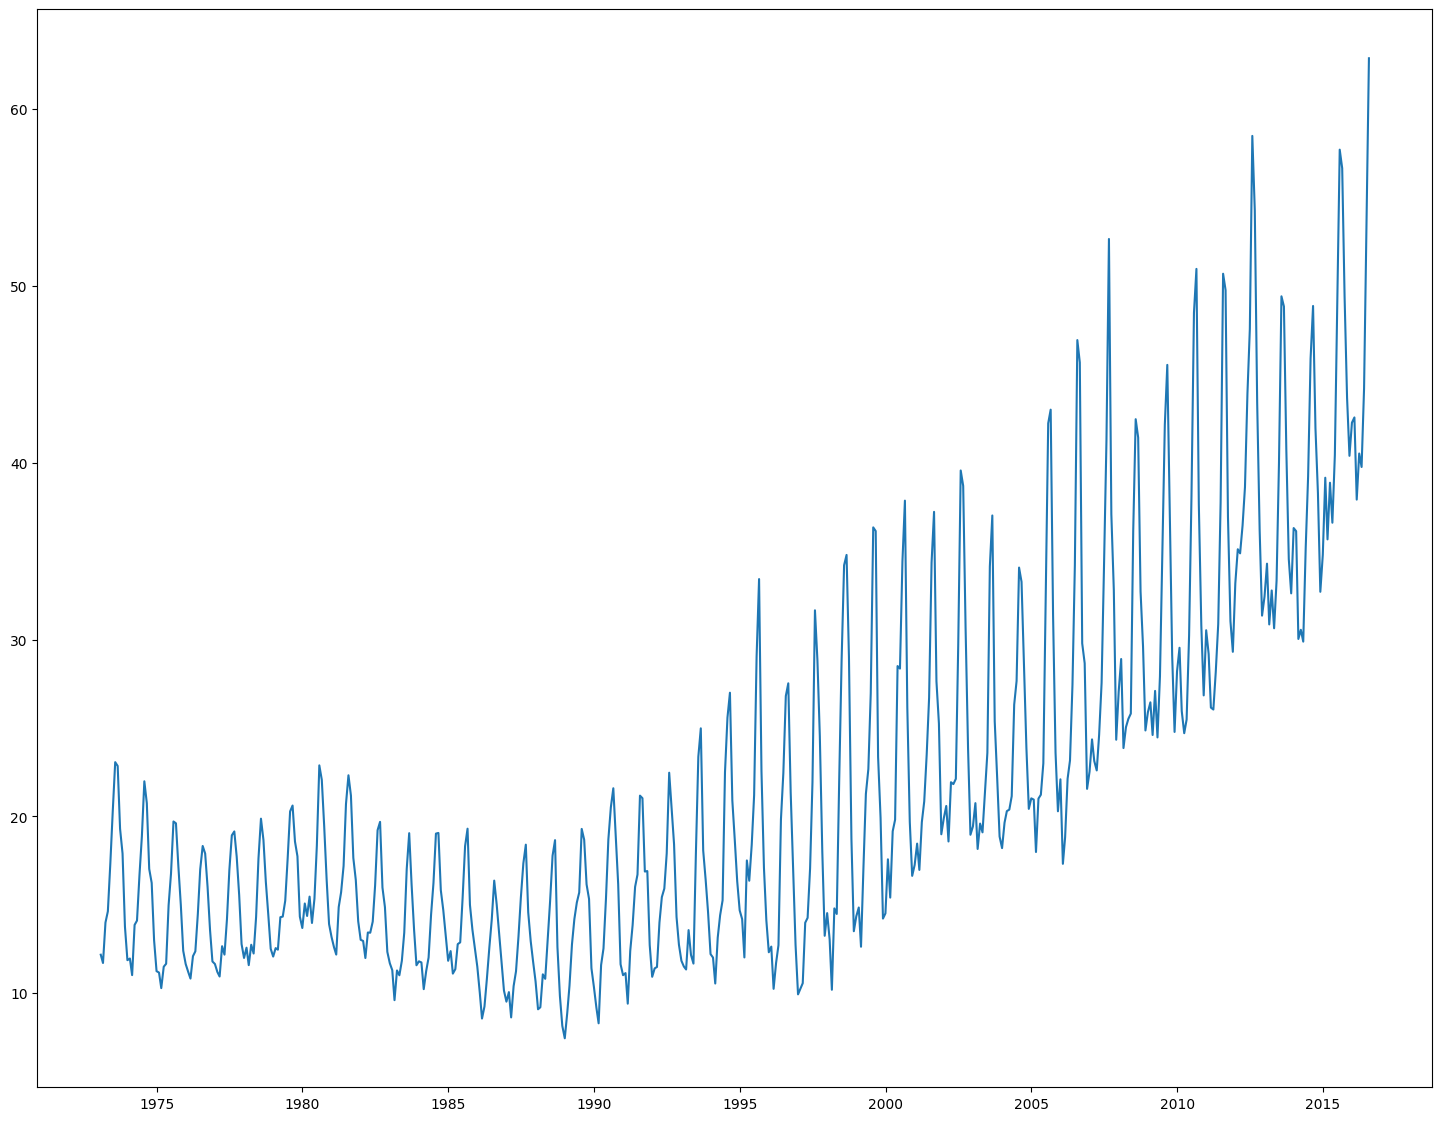

In [28]:
plt.plot(mte)
plt.show()

In [29]:
# dua tren bieu do ta thay du lieu thay doi theo thoi gian

### Decomposition

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
decomposition = seasonal_decompose(mte)

In [32]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

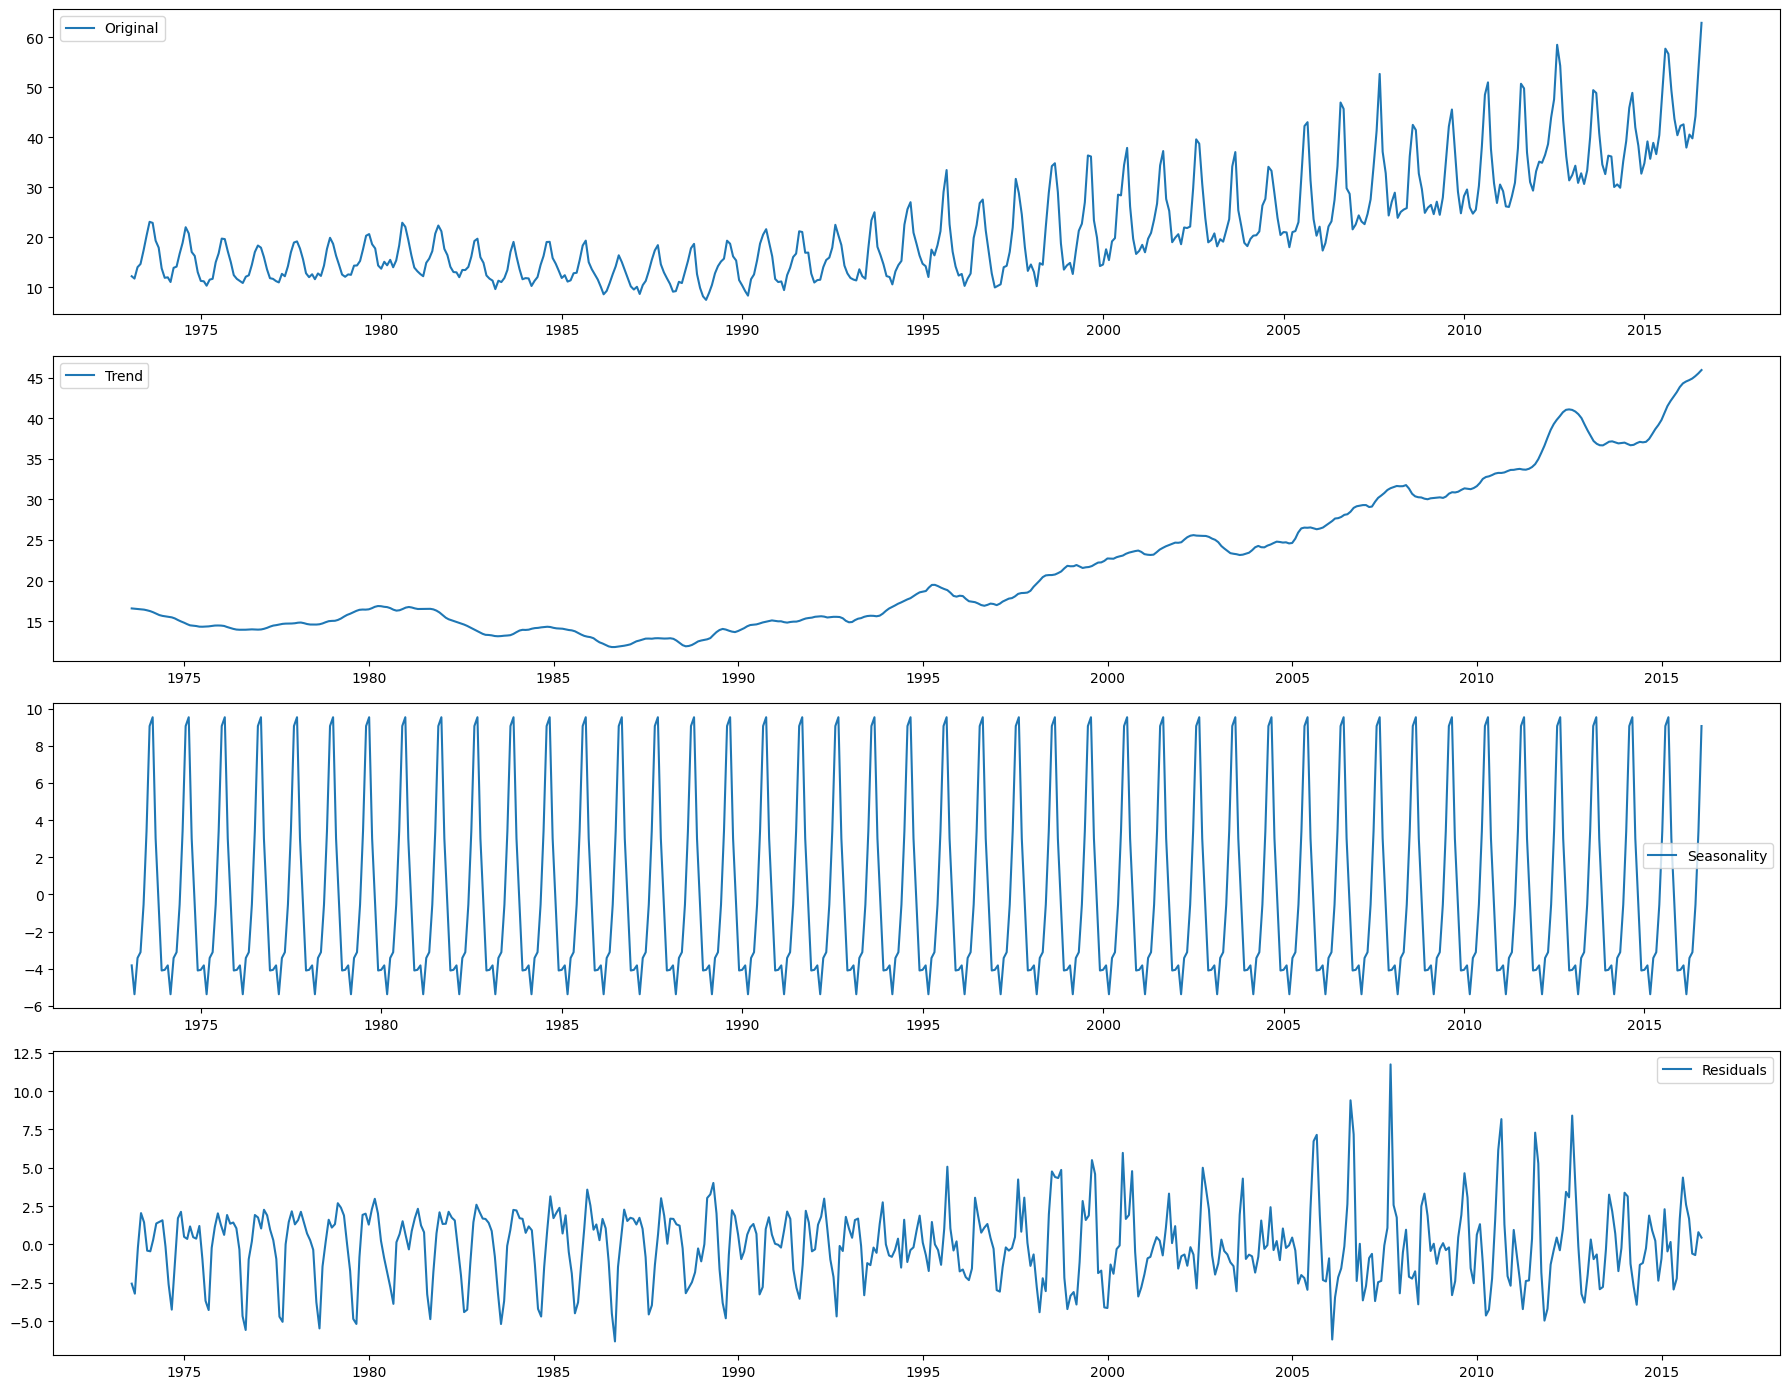

In [33]:
plt.subplot(411)
plt.plot(mte, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [35]:
# ta nhan thay `Trend` va 'Seasonality' tach biet khoi du lieu

In [37]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
# khao sat `residual`

In [45]:
def TestStationaryPlot(ts, plot_label = None):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    if plot_label is not None:
        plt.title('Rolling Mean & Standard Deviation (' + plot_label + ')', fontsize = 25)
    else:
        plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

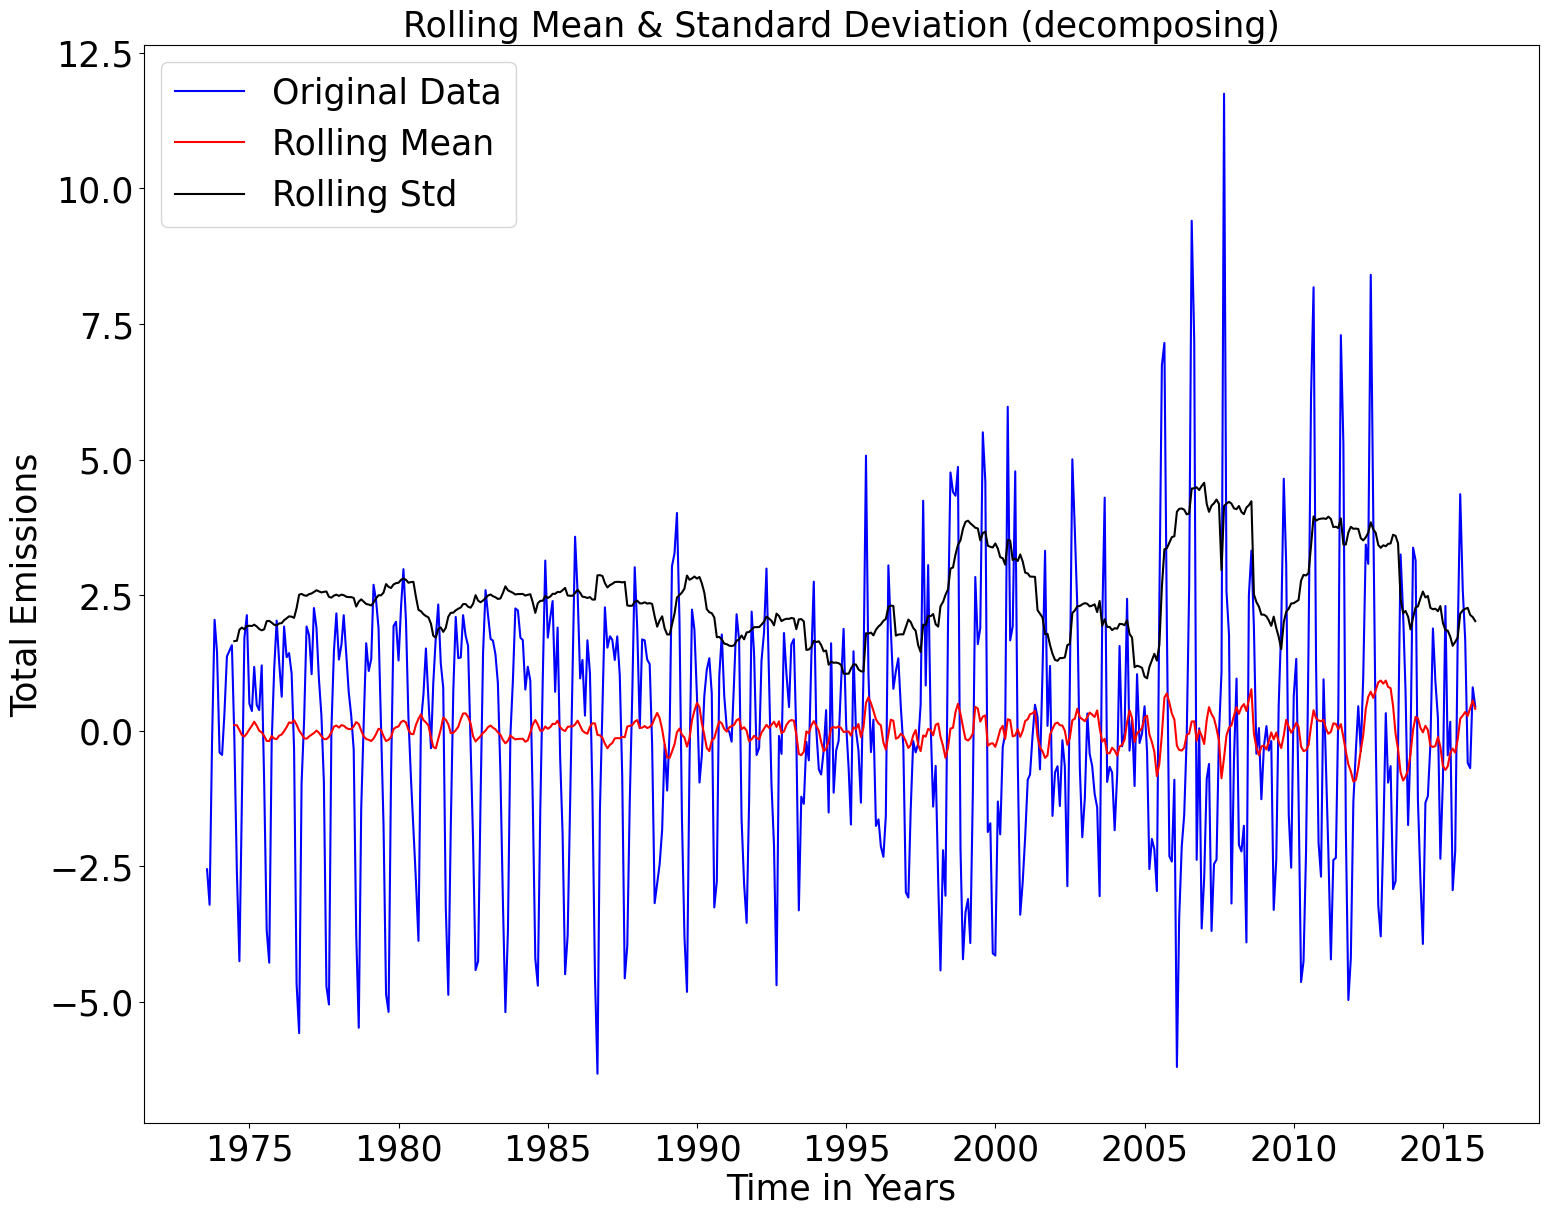

In [46]:
# check stationarity of residuals
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose, 'decomposing')

### Build SARIMA model

In [71]:
# split train/test
start_date = datetime(1973,1,1)
end_date = datetime(2016,7,1)
train_end = datetime(2014,1,1)
test_end = datetime(2016,7,1)
train_data = mte[:train_end]
test_data = mte[train_end + timedelta(days=1):test_end]

In [72]:
# generating the various combination of parameters
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [73]:
# finding best param

In [74]:
aic_results = []
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            model = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
            if results.mle_retvals is not None and results.mle_retvals['converged'] == False:
                print(results.mle_retvals)
            aic_results.append(results.aic)
        except:
            continue
aic_results.sort()
print('Best AIC found: ', aic_results[0])

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:4448.237196145049
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:3801.609686304289
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2353.274269882839
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2273.543150557325
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2346.2466203427525
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2262.6315422937105
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2275.0208556541015
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2272.909736633649
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:3840.904890739152
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:3288.844455705207
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2157.9757829188243
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2058.128423409244
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2162.8601293968036
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2162.408297731329
{'fopt': 2.189439326962733, 'gopt': array([-1.91768155e-02, -4.24005474e-02, -3.83639387e-04, -8.54870579e-01]), 'fcalls': 410, 'warnflag': 1, 'converged': False, 'iterations': 50}
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2069.5359829605613
ARIMA(0, 0, 1)x(1,

In [75]:
# Best AIC found:  1867.0797615229974 => SARIMA(1, 1, 1)x(0, 1, 1, 12)

In [76]:
model = sm.tsa.statespace.SARIMAX(train_data, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)

start = time()
results = model.fit()
end = time()
print('Model Fitting Time:', end - start)
print(results.summary())

Model Fitting Time: 1.338167428970337
                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  492
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -929.540
Date:                                             Wed, 05 Oct 2022   AIC                           1867.080
Time:                                                     17:30:57   BIC                           1883.648
Sample:                                                 01-31-1973   HQIC                          1873.601
                                                      - 12-31-2013                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

<AxesSubplot:xlabel='YYYYMM'>

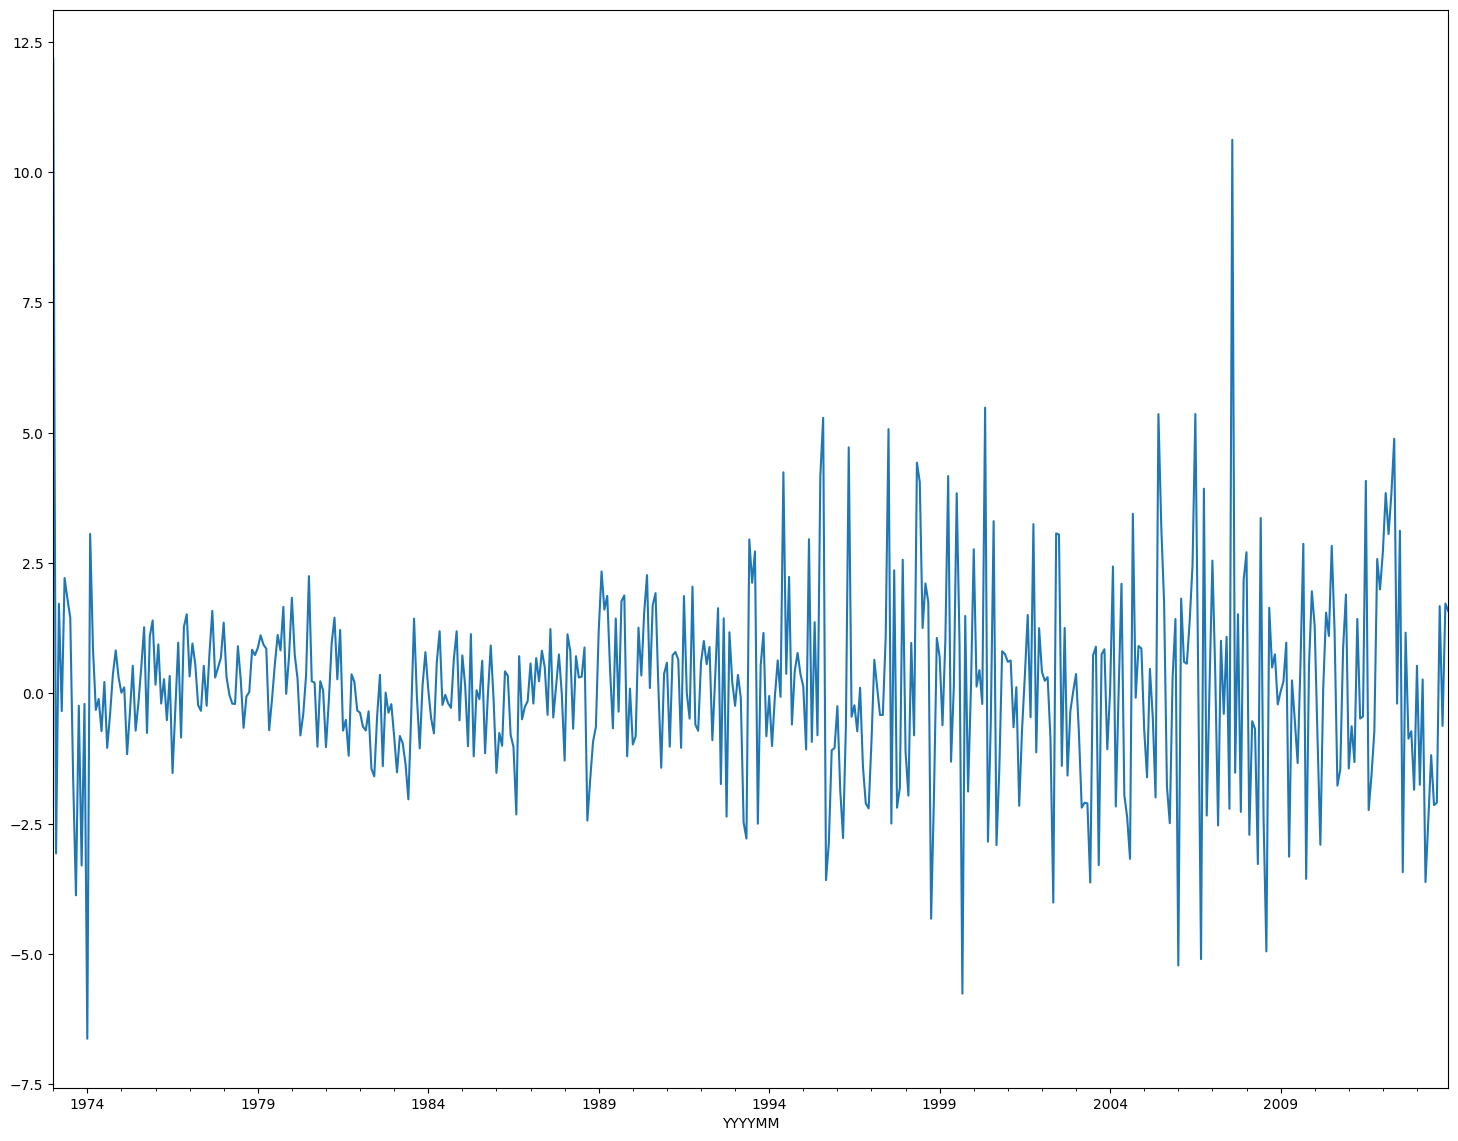

In [77]:
results.resid.plot()

In [78]:
results.resid.describe()

count    492.000000
mean       0.136092
std        1.871128
min       -6.624219
25%       -0.808871
50%        0.119323
75%        0.969988
max       12.175000
dtype: float64

In [79]:
#get the predictions and residuals
predictions = results.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

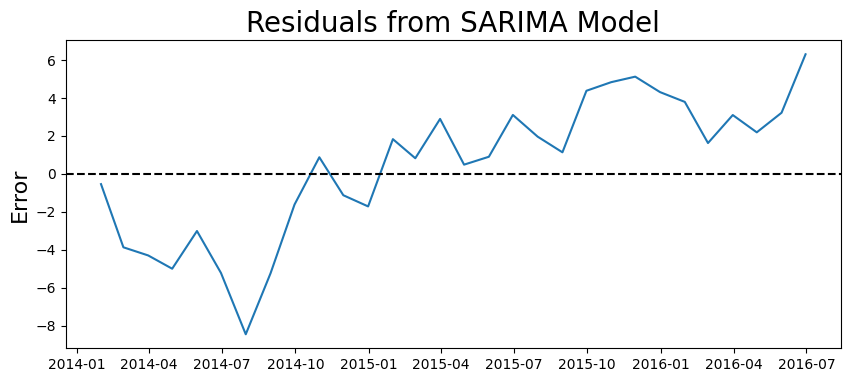

In [80]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

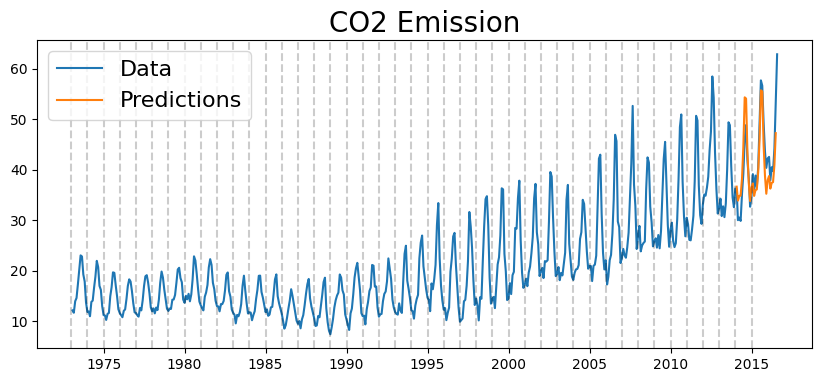

In [95]:
plt.figure(figsize=(10,4))

plt.plot(mte)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('CO2 Emission', fontsize=20)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [90]:
# nhan thay model hoat dong tot tren tap test

### Forecasting

In [96]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2014-01-31,33.190676,40.153850
2014-02-28,29.687858,38.122869
2014-03-31,30.315284,39.390349
2014-04-30,30.184546,39.582271
2014-05-31,33.432165,43.012187


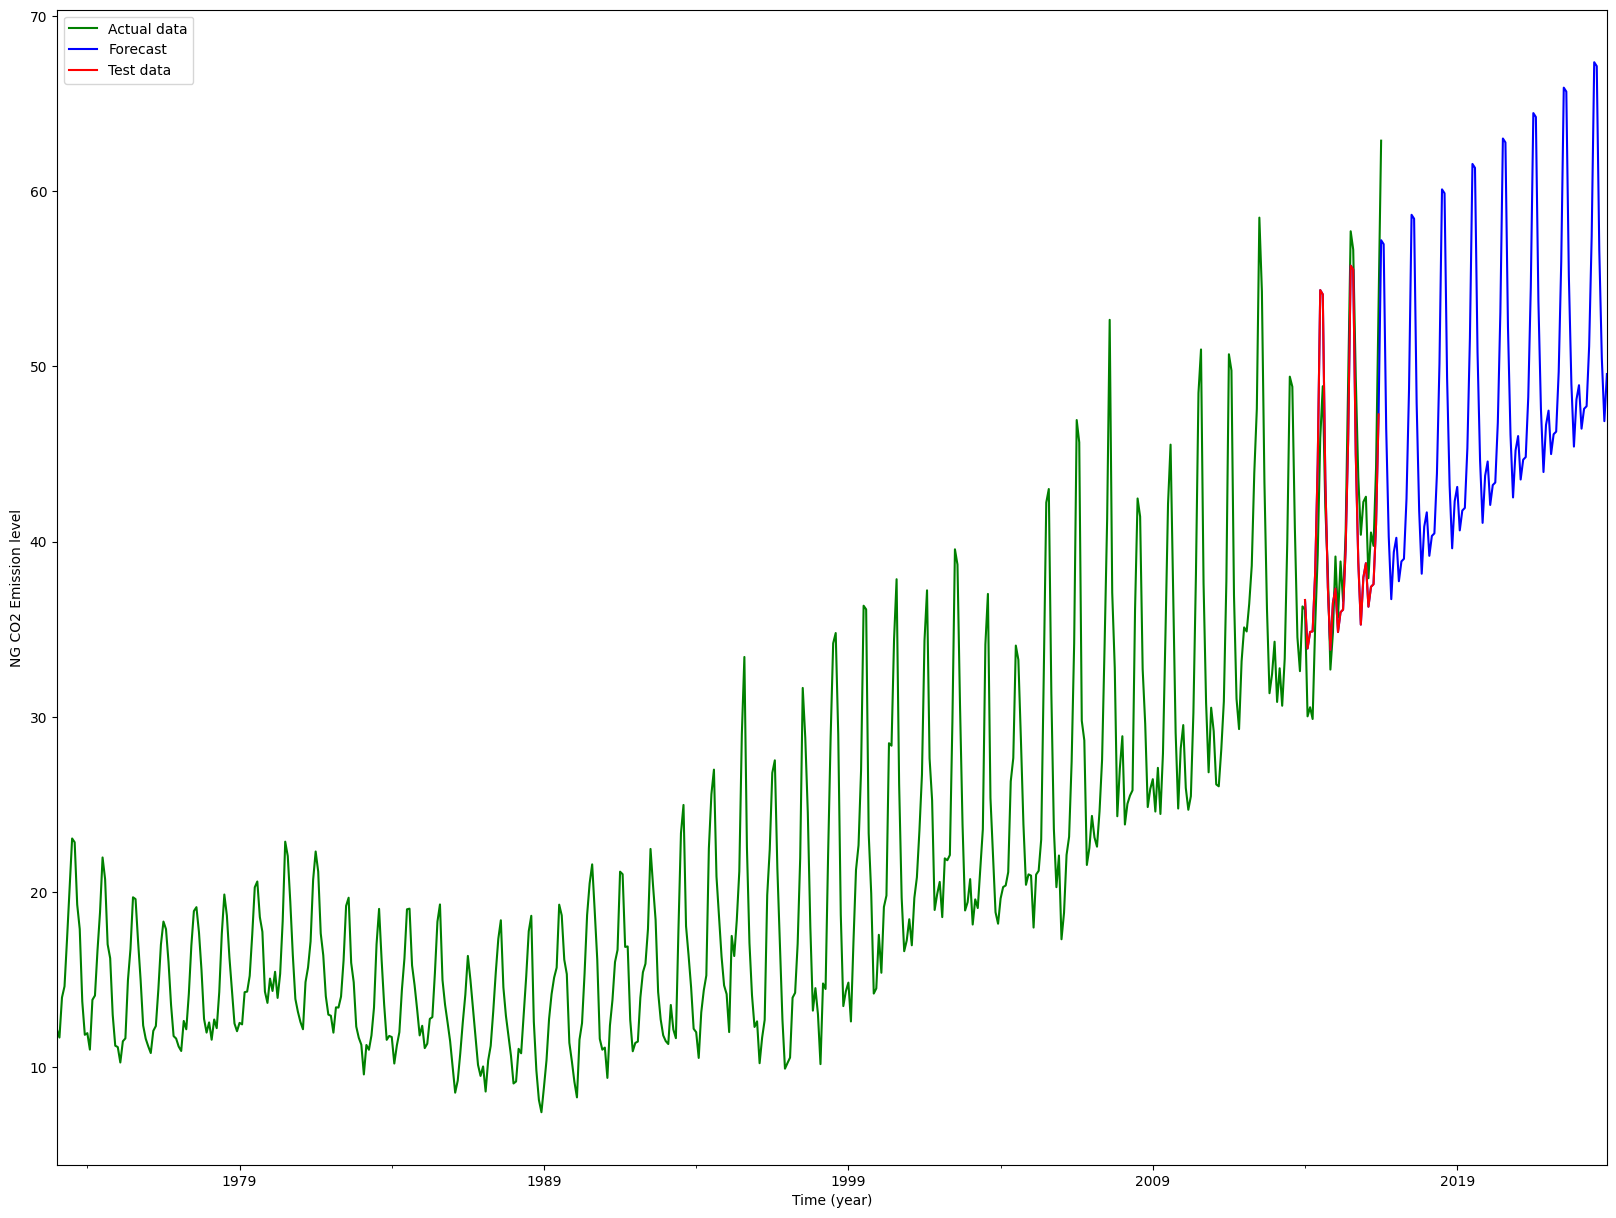

In [99]:
ax = mte.plot(label='Actual data', figsize=(20, 15), color='g')
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='b')
predictions.plot(label='Test data', color='r')
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')
plt.legend()
plt.show()

In [100]:
# nhan xet: model cho ket qua co the chap nhan duoc